In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D, BatchNormalization, InputLayer, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model,to_categorical
import pandas as pd
import seaborn as sns
import time

In [2]:
label_train = np.load("array/label_train_feat.npy")
img_train = np.load("array/img_train_feat.npy")
label_val = np.load("array/label_val_feat.npy")
img_val = np.load("array/img_val_feat.npy")
label_test = np.load("array/label_test_feat.npy")
img_test = np.load("array/img_test_feat.npy")

In [3]:
print(img_train.shape, img_val.shape)
print(label_train.shape, label_val.shape)

(4388, 205) (1100, 205)
(4388,) (1100,)


In [4]:
label_train = to_categorical(label_train)
label_val = to_categorical(label_val)  
label_test = to_categorical(label_test) 

label_train = np.reshape(label_train, (label_train.shape[0], 6))
img_train = np.reshape(img_train, (img_train.shape[0], img_train.shape[1], 1))
label_val = np.reshape(label_val, (label_val.shape[0], 6))
img_val = np.reshape(img_val, (img_val.shape[0], img_val.shape[1],  1))
label_test = np.reshape(label_test, (label_test.shape[0], 6))
img_test = np.reshape(img_test, (img_test.shape[0], img_test.shape[1],  1))

In [5]:
print(img_train.shape, img_val.shape, img_test.shape)
print(label_train.shape, label_val.shape, label_test.shape)

(4388, 205, 1) (1100, 205, 1) (1372, 205, 1)
(4388, 6) (1100, 6) (1372, 6)


In [9]:
model = Sequential()
model.add(InputLayer(input_shape=(205,1)))

model.add(Conv1D(8, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(16, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(32, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(450))
model.add(Activation('relu'))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 203, 8)            32        
_________________________________________________________________
batch_normalization_3 (Batch (None, 203, 8)            32        
_________________________________________________________________
activation_6 (Activation)    (None, 203, 8)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 101, 8)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 99, 16)            400       
_________________________________________________________________
batch_normalization_4 (Batch (None, 99, 16)            64        
_________________________________________________________________
activation_7 (Activation)    (None, 99, 16)           

In [10]:
checkpoint = ModelCheckpoint("progress_01.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

In [11]:
start = time.time()
history = model.fit(img_train,label_train, epochs=200, steps_per_epoch = 5, validation_data=(img_val, label_val),callbacks=[checkpoint])
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/200
5/5 [==============================] - 4s 147ms/step - loss: 1.1555 - accuracy: 0.6812 - mae: 0.1142 - val_loss: 1.5990 - val_accuracy: 0.8364 - val_mae: 0.0574

Epoch 00001: val_accuracy improved from -inf to 0.83636, saving model to progress_01.h5
Epoch 2/200
5/5 [==============================] - 0s 32ms/step - loss: 0.7216 - accuracy: 0.8380 - mae: 0.1096 - val_loss: 0.9005 - val_accuracy: 0.8364 - val_mae: 0.0734

Epoch 00002: val_accuracy did not improve from 0.83636
Epoch 3/200
5/5 [==============================] - 0s 34ms/step - loss: 0.6829 - accuracy: 0.8380 - mae: 0.0846 - val_loss: 0.7517 - val_accuracy: 0.8364 - val_mae: 0.1144

Epoch 00003: val_accuracy did not improve from 0.83636
Epoch 4/200
5/5 [==============================] - 0s 32ms/step - loss: 0.6603 - accuracy: 0.8380 - mae: 0.0987 - val_loss: 0.7271 - val_accuracy: 0.8364 - val_mae: 0.1185

Epoch 00004: val_accuracy did not improve from 0.83636
Epoch 5/200
5/5 [==============================] - 0s 


Epoch 00036: val_accuracy did not improve from 0.83636
Epoch 37/200
5/5 [==============================] - 0s 34ms/step - loss: 0.5691 - accuracy: 0.8423 - mae: 0.0870 - val_loss: 0.7203 - val_accuracy: 0.8364 - val_mae: 0.1339

Epoch 00037: val_accuracy did not improve from 0.83636
Epoch 38/200
5/5 [==============================] - 0s 34ms/step - loss: 0.5693 - accuracy: 0.8434 - mae: 0.0876 - val_loss: 0.7248 - val_accuracy: 0.8364 - val_mae: 0.1379

Epoch 00038: val_accuracy did not improve from 0.83636
Epoch 39/200
5/5 [==============================] - 0s 35ms/step - loss: 0.5765 - accuracy: 0.8434 - mae: 0.0857 - val_loss: 0.7509 - val_accuracy: 0.8373 - val_mae: 0.1435

Epoch 00039: val_accuracy improved from 0.83636 to 0.83727, saving model to progress_01.h5
Epoch 40/200
5/5 [==============================] - 0s 31ms/step - loss: 0.5764 - accuracy: 0.8428 - mae: 0.0893 - val_loss: 0.6833 - val_accuracy: 0.8364 - val_mae: 0.1268

Epoch 00040: val_accuracy did not improve from 

5/5 [==============================] - 0s 32ms/step - loss: 0.4795 - accuracy: 0.8519 - mae: 0.0777 - val_loss: 0.5655 - val_accuracy: 0.8427 - val_mae: 0.0883

Epoch 00071: val_accuracy did not improve from 0.84364
Epoch 72/200
5/5 [==============================] - 0s 32ms/step - loss: 0.4986 - accuracy: 0.8489 - mae: 0.0856 - val_loss: 0.6978 - val_accuracy: 0.8400 - val_mae: 0.0616

Epoch 00072: val_accuracy did not improve from 0.84364
Epoch 73/200
5/5 [==============================] - 0s 34ms/step - loss: 0.5679 - accuracy: 0.8428 - mae: 0.0805 - val_loss: 0.5814 - val_accuracy: 0.8418 - val_mae: 0.0745

Epoch 00073: val_accuracy did not improve from 0.84364
Epoch 74/200
5/5 [==============================] - 0s 33ms/step - loss: 0.5222 - accuracy: 0.8482 - mae: 0.0790 - val_loss: 0.5920 - val_accuracy: 0.8418 - val_mae: 0.0882

Epoch 00074: val_accuracy did not improve from 0.84364
Epoch 75/200
5/5 [==============================] - 0s 33ms/step - loss: 0.5019 - accuracy: 0.847


Epoch 00106: val_accuracy did not improve from 0.84545
Epoch 107/200
5/5 [==============================] - 0s 34ms/step - loss: 0.4207 - accuracy: 0.8569 - mae: 0.0698 - val_loss: 0.5521 - val_accuracy: 0.8327 - val_mae: 0.0945

Epoch 00107: val_accuracy did not improve from 0.84545
Epoch 108/200
5/5 [==============================] - 0s 32ms/step - loss: 0.4137 - accuracy: 0.8626 - mae: 0.0695 - val_loss: 0.5477 - val_accuracy: 0.8245 - val_mae: 0.0934

Epoch 00108: val_accuracy did not improve from 0.84545
Epoch 109/200
5/5 [==============================] - 0s 34ms/step - loss: 0.4105 - accuracy: 0.8621 - mae: 0.0715 - val_loss: 0.5396 - val_accuracy: 0.8409 - val_mae: 0.0861

Epoch 00109: val_accuracy did not improve from 0.84545
Epoch 110/200
5/5 [==============================] - 0s 31ms/step - loss: 0.4098 - accuracy: 0.8637 - mae: 0.0704 - val_loss: 0.5419 - val_accuracy: 0.8445 - val_mae: 0.0730

Epoch 00110: val_accuracy did not improve from 0.84545
Epoch 111/200
5/5 [=====

5/5 [==============================] - 0s 32ms/step - loss: 0.3648 - accuracy: 0.8785 - mae: 0.0623 - val_loss: 0.5147 - val_accuracy: 0.8382 - val_mae: 0.0829

Epoch 00142: val_accuracy did not improve from 0.86455
Epoch 143/200
5/5 [==============================] - 0s 33ms/step - loss: 0.3538 - accuracy: 0.8767 - mae: 0.0627 - val_loss: 0.5921 - val_accuracy: 0.8100 - val_mae: 0.1033

Epoch 00143: val_accuracy did not improve from 0.86455
Epoch 144/200
5/5 [==============================] - 0s 32ms/step - loss: 0.3608 - accuracy: 0.8758 - mae: 0.0642 - val_loss: 0.4988 - val_accuracy: 0.8473 - val_mae: 0.0718

Epoch 00144: val_accuracy did not improve from 0.86455
Epoch 145/200
5/5 [==============================] - 0s 33ms/step - loss: 0.3445 - accuracy: 0.8824 - mae: 0.0609 - val_loss: 0.4815 - val_accuracy: 0.8609 - val_mae: 0.0736

Epoch 00145: val_accuracy did not improve from 0.86455
Epoch 146/200
5/5 [==============================] - 0s 34ms/step - loss: 0.3428 - accuracy: 0


Epoch 00177: val_accuracy did not improve from 0.86455
Epoch 178/200
5/5 [==============================] - 0s 35ms/step - loss: 0.3165 - accuracy: 0.8861 - mae: 0.0566 - val_loss: 0.5055 - val_accuracy: 0.8527 - val_mae: 0.0766

Epoch 00178: val_accuracy did not improve from 0.86455
Epoch 179/200
5/5 [==============================] - 0s 34ms/step - loss: 0.3077 - accuracy: 0.8922 - mae: 0.0568 - val_loss: 0.4949 - val_accuracy: 0.8618 - val_mae: 0.0698

Epoch 00179: val_accuracy did not improve from 0.86455
Epoch 180/200
5/5 [==============================] - 0s 33ms/step - loss: 0.3024 - accuracy: 0.8959 - mae: 0.0550 - val_loss: 0.4782 - val_accuracy: 0.8636 - val_mae: 0.0639

Epoch 00180: val_accuracy did not improve from 0.86455
Epoch 181/200
5/5 [==============================] - 0s 33ms/step - loss: 0.3015 - accuracy: 0.8940 - mae: 0.0548 - val_loss: 0.4910 - val_accuracy: 0.8527 - val_mae: 0.0710

Epoch 00181: val_accuracy did not improve from 0.86455
Epoch 182/200
5/5 [=====

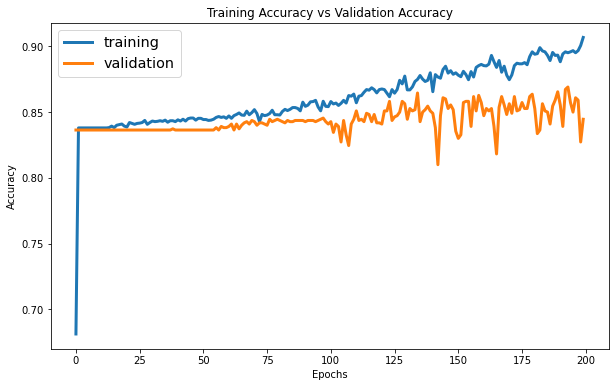

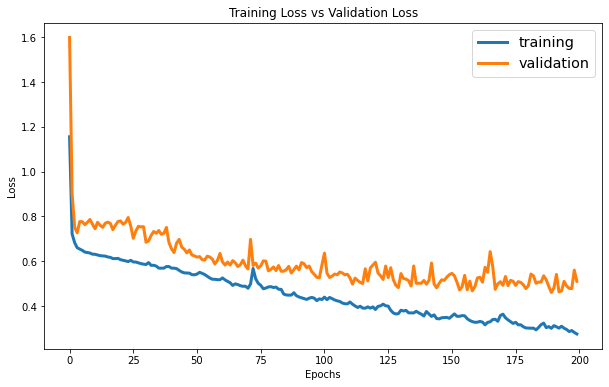

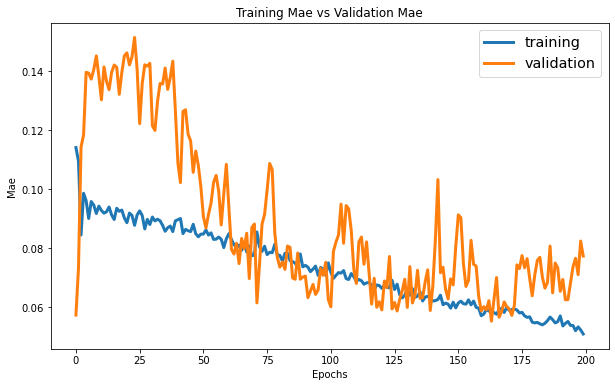

In [12]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'training', linewidth = 3)
plt.plot(history.history['val_accuracy'], label = 'validation', linewidth = 3)
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Accuracy vs Validation Accuracy_Batuk.jpg")

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'training', linewidth = 3)
plt.plot(history.history['val_loss'], label = 'validation', linewidth = 3)
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize = 'x-large')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(history.history['mae'], label = 'training', linewidth = 3)
plt.plot(history.history['val_mae'], label = 'validation', linewidth = 3)
plt.title('Training Mae vs Validation Mae')
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Loss vs Validation Loss_Batuk.jpg")

                precision    recall  f1-score   support

Bronchiectasis       0.00      0.00      0.00        21
 Bronchiolitis       0.06      0.12      0.08        32
          COPD       0.91      0.91      0.91      1149
       Healthy       0.04      0.03      0.04        64
     Pneumonia       0.33      0.04      0.06        57
          URTI       0.13      0.22      0.16        49

      accuracy                           0.78      1372
     macro avg       0.25      0.22      0.21      1372
  weighted avg       0.79      0.78      0.78      1372



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

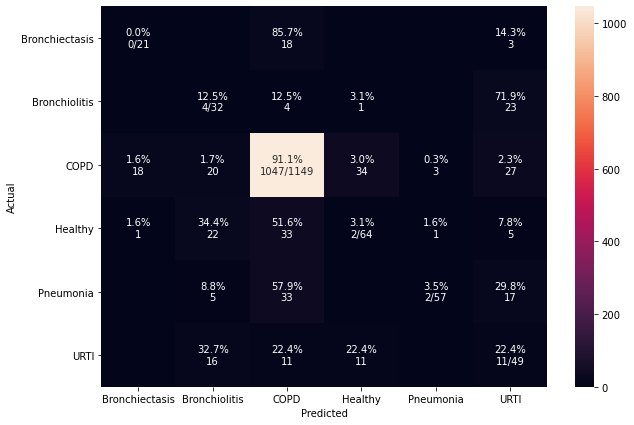

In [13]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
matrix_index = ['Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Pneumonia', 'URTI']

preds = model.predict(img_test)
classpreds = np.argmax(preds, axis=1) # predicted classes 
y_testclass = np.argmax(label_test, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')
#plt.savefig("Pic/Table Crosscheck_Batuk.jpg")